In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway


In [29]:
# Load sentiment dataset
sentiment = pd.read_csv('/home/rguktongole/Downloads/fear_greed_index.csv')  

# Load historical trader dataset
trader = pd.read_csv('/home/rguktongole/Downloads/historical_data.csv') 


In [50]:
sentiment.columns

Index(['timestamp', 'value', 'classification', 'date', 'Date'], dtype='object')

In [51]:
trader.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'Date'],
      dtype='object')

In [38]:
sentiment.head()

,timestamp,value,classification,date,Date
0,1517463000,30,Fear,2018-02-01,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02
2,1517635800,40,Fear,2018-02-03,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05


In [40]:
# Proper conversion from Unix time in seconds
sentiment['timestamp'] = pd.to_datetime(sentiment['timestamp'], unit='s')
sentiment['Date'] = sentiment['timestamp'].dt.date

In [39]:
trader.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50,1970-01-01
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50,1970-01-01
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50,1970-01-01
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50,1970-01-01
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50,1970-01-01


In [41]:
trader['Timestamp'] = pd.to_datetime(trader['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')

# Step 2: Extract date
trader['Date'] = trader['Timestamp'].dt.date

In [42]:
merged_df = pd.merge(trader, sentiment, on='Date', how='inner')

In [43]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,2024-12-02 22:50:00,2024-12-02,2024-12-02 05:30:00,80,Extreme Greed,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,2024-12-02 22:50:00,2024-12-02,2024-12-02 05:30:00,80,Extreme Greed,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,2024-12-02 22:50:00,2024-12-02,2024-12-02 05:30:00,80,Extreme Greed,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,2024-12-02 22:50:00,2024-12-02,2024-12-02 05:30:00,80,Extreme Greed,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,2024-12-02 22:50:00,2024-12-02,2024-12-02 05:30:00,80,Extreme Greed,2024-12-02


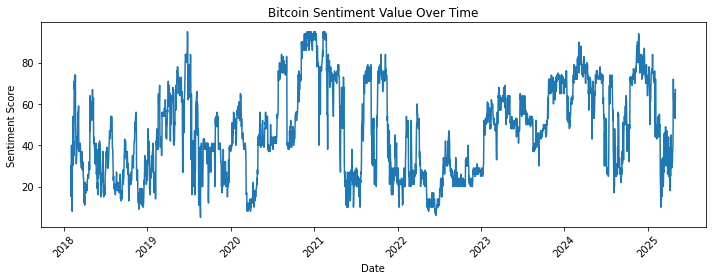

In [44]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=sentiment, x='date', y='value')
plt.title('Bitcoin Sentiment Value Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [45]:
print(merged_df.shape)
print(merged_df[['Closed PnL', 'value', 'classification']].isnull().sum())


(211218, 21)
Closed PnL        0
value             0
classification    0
dtype: int64


<ipython-input-46-a36c99a07731>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_pnl_by_sentiment, x='classification', y='Closed PnL', palette='viridis')


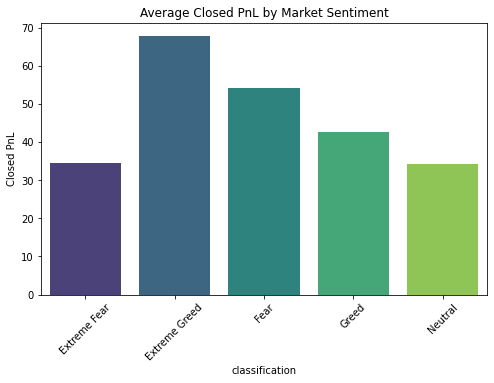

In [46]:
avg_pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_pnl_by_sentiment, x='classification', y='Closed PnL', palette='viridis')
plt.title('Average Closed PnL by Market Sentiment')
plt.xticks(rotation=45)
plt.show()


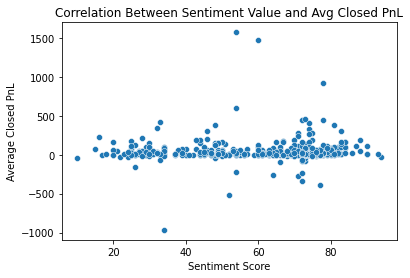

Correlation coefficient: 0.04


In [47]:
daily = merged_df.groupby('Date').agg({
    'Closed PnL': 'mean',
    'value': 'mean'
}).reset_index()

sns.scatterplot(data=daily, x='value', y='Closed PnL')
plt.title('Correlation Between Sentiment Value and Avg Closed PnL')
plt.xlabel('Sentiment Score')
plt.ylabel('Average Closed PnL')
plt.show()

correlation = daily['value'].corr(daily['Closed PnL'])
print(f"Correlation coefficient: {correlation:.2f}")


In [48]:
# Create PnL lists by sentiment class
groups = merged_df.groupby('classification')['Closed PnL'].apply(list)

# Perform ANOVA test
stat, p = f_oneway(*groups)
print(f"ANOVA F-statistic: {stat:.2f}, p-value: {p:.4f}")
if p < 0.05:
    print("=> Significant difference in PnL between sentiment classes")
else:
    print("=> No significant difference in PnL between sentiment classes")


ANOVA F-statistic: 9.06, p-value: 0.0000
=> Significant difference in PnL between sentiment classes


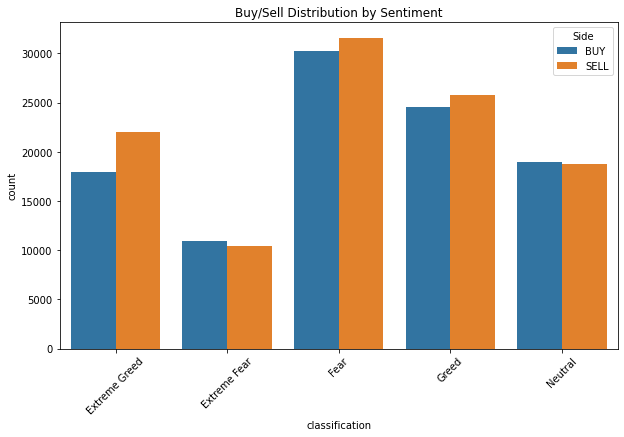

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='classification', hue='Side')
plt.title('Buy/Sell Distribution by Sentiment')
plt.xticks(rotation=45)
plt.show()